In [53]:
# Importing necessary packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # For data visualisation
import seaborn as sns # For data visualisation

import warnings

In [54]:
apps = pd.read_csv("archive/googleplaystore.csv")
df = apps.copy()
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [55]:
# Display the column names
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [56]:
# View the number of rows and columns
print(f"The dataframe has {df.shape[0]} rows and {df.shape[1]} columns")

The dataframe has 10841 rows and 13 columns


In [57]:
# Display detailed information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [58]:
# Display descriptive statistics for numerical columns
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## Descriptive Statistics Observations -1¶
Rating Diversity:

Ratings vary from 0 to 5, showcasing diverse user opinions on app quality.
User Engagement Range:

'Rating Count' spans from 0 to 138,557,600, indicating varying app popularity.
Installation Metrics Spectrum:

'Minimum' and 'Maximum Installs' reflect a wide range, from 0 to 5 billion, highlighting diverse app popularity.
Pricing Landscape:

Most apps are free (75% with a price of 0), but premium-priced apps exist, reaching a max of 399.99.

### Numeric Considerations¶
Observation 1: 'Size' and 'Installs' columns may contain non-numeric characters ('M', 'K', '+'). Transforming them into numeric formats is crucial for accurate numerical operations.


In [59]:
# Code to check and display the count of missing values in each column, sorted in descending order
df.isnull().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

In [60]:
# Assuming df is your DataFrame containing the 'Rating' column
rating_stats = df['Rating'].describe()

# Print the statistical summary
print(rating_stats)

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64


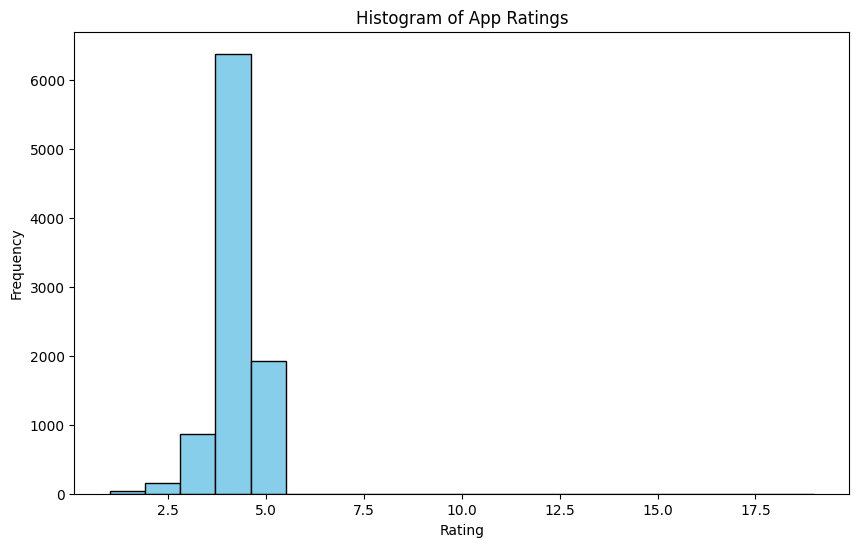

In [61]:


plt.figure(figsize=(10,6))
plt.hist(df['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of App Ratings')
plt.show()

In [51]:

# Assuming 'df' is your DataFrame containing the data

# Create a pivot table to aggregate ratings by category
ratings_table = pd.pivot_table(df, values='Rating', index='Category', aggfunc='mean')

# Sort the table by ratings in descending order
ratings_table = ratings_table.sort_values(by='Rating', ascending=False)

# Display the table
display(ratings_table)


,Rating
Category,
EVENTS,4.443333
EDUCATION,4.389032
ART_AND_DESIGN,4.377049
BOOKS_AND_REFERENCE,4.350281
PERSONALIZATION,4.339263
HEALTH_AND_FITNESS,4.333670
PARENTING,4.328000
GAME,4.294576
BEAUTY,4.282143


/var/folders/kt/3_xkvbt50nl1g9rk19fkhzq00000gn/T/ipykernel_2071/2443067429.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Rating', data=df, palette='viridis')


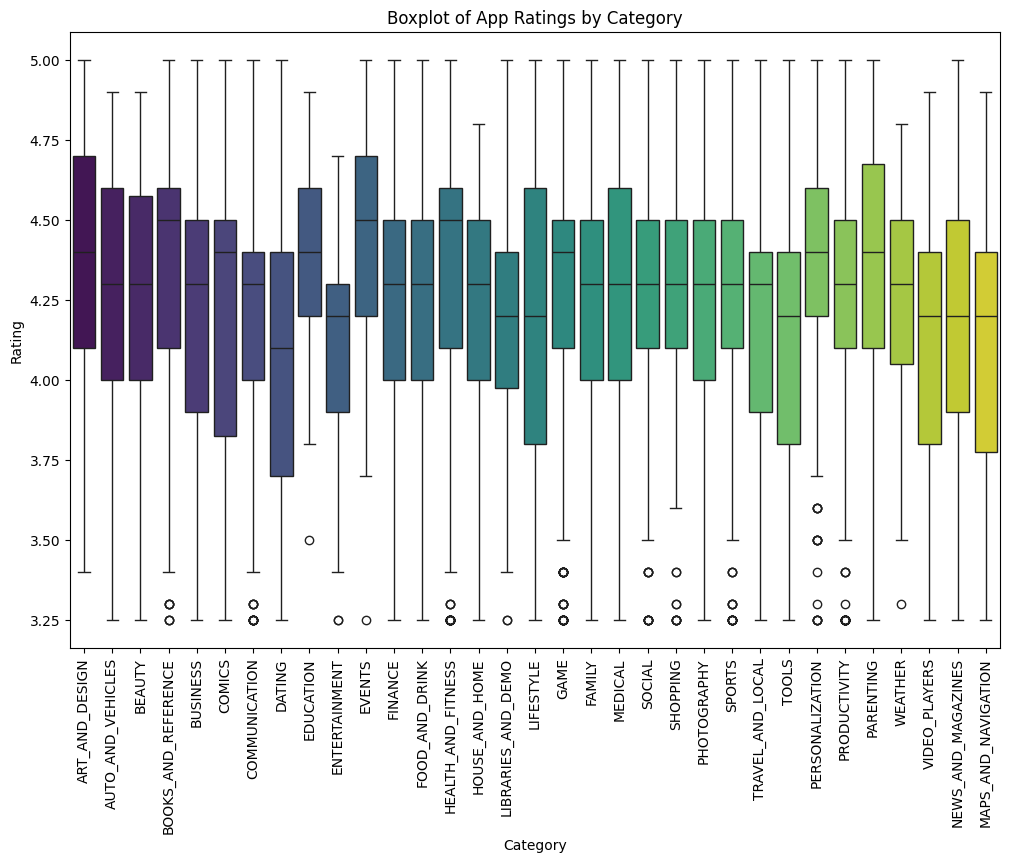

In [45]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Category', y='Rating', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Boxplot of App Ratings by Category')
plt.show()

In [52]:

category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
category_counts = category_counts.sort_values(by='Count', ascending=False)

print(category_counts)


               Category  Count
0                FAMILY   1746
1                  GAME   1097
2                 TOOLS    733
3          PRODUCTIVITY    351
4               MEDICAL    350
5         COMMUNICATION    328
6               FINANCE    323
7                SPORTS    319
8           PHOTOGRAPHY    317
9             LIFESTYLE    314
10      PERSONALIZATION    312
11             BUSINESS    303
12   HEALTH_AND_FITNESS    297
13               SOCIAL    259
14             SHOPPING    238
15   NEWS_AND_MAGAZINES    233
16     TRAVEL_AND_LOCAL    226
17               DATING    195
18  BOOKS_AND_REFERENCE    178
19        VIDEO_PLAYERS    160
20            EDUCATION    155
21        ENTERTAINMENT    149
22  MAPS_AND_NAVIGATION    124
23       FOOD_AND_DRINK    109
24       HOUSE_AND_HOME     76
25              WEATHER     75
26    AUTO_AND_VEHICLES     73
27   LIBRARIES_AND_DEMO     64
28       ART_AND_DESIGN     61
29               COMICS     58
30            PARENTING     50
31      

/var/folders/kt/3_xkvbt50nl1g9rk19fkhzq00000gn/T/ipykernel_2071/1421466616.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=df, palette='magma', order=df['Category'].value_counts().index)


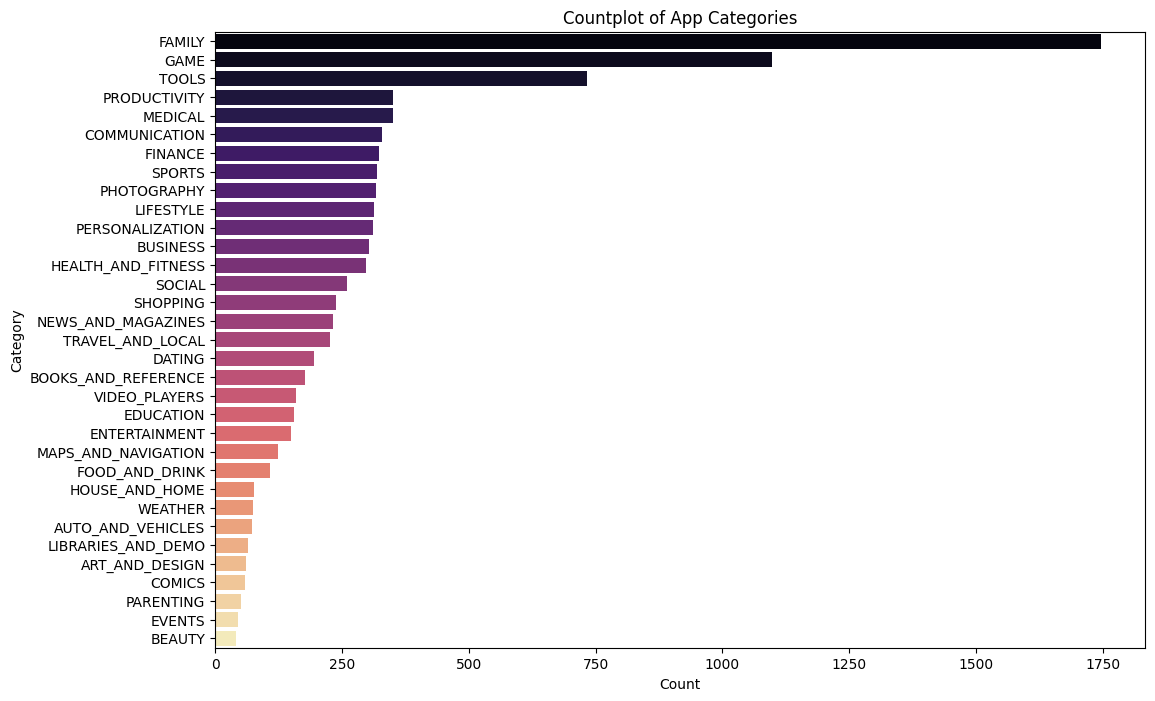

In [46]:
plt.figure(figsize=(12,8))
sns.countplot(y='Category', data=df, palette='magma', order=df['Category'].value_counts().index)
plt.title('Countplot of App Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

## Summary :

### From the provided data and descriptions:

- The dataset contains information about various apps, including their names, categories, ratings, reviews, size, installs, type, price, content rating, genres, last updated date, current version, and required Android version.
- There are a total of 9360 entries in the dataset, with no missing values.
- The 'Rating' column has a mean rating of approximately 4.22, with a minimum rating of 3.25 and a maximum rating of 5.00. Ratings seem to be positively skewed as the median (50th percentile) rating is higher than the mean.
- When grouped by category, the highest average ratings are observed in the 'EVENTS', 'EDUCATION', and 'ART_AND_DESIGN' categories, while the lowest average ratings are in the 'DATING', 'MAPS_AND_NAVIGATION', and 'VIDEO_PLAYERS' categories.
- The most common category in the dataset is 'FAMILY', followed by 'GAME' and 'TOOLS'.

### Observations:

- There is a wide range of app categories represented in the dataset, indicating diversity in the types of apps available.
- The distribution of app ratings appears to be skewed towards higher ratings, with the majority of apps having ratings above 4.0.
- Certain categories such as 'EVENTS' and 'EDUCATION' tend to have higher average ratings, which may suggest that apps in these categories are generally well-received by users.
- The most common category, 'FAMILY', suggests that apps targeting family or children audiences are prevalent in the dataset.
- Further analysis could involve exploring relationships between ratings and other factors such as reviews, installs, and price, as well as investigating trends over time based on the 'Last Updated' column.